In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

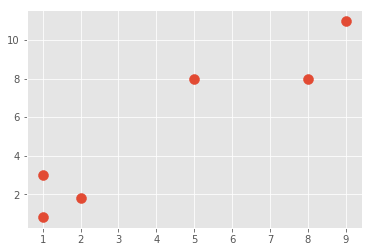

In [43]:
# input features
X = np.array([
    [1, 3],
    [2, 1.8],
    [5, 8],
    [8, 8],
    [1., 0.8],
    [9, 11]
    ])
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [44]:
# colors for our groups 
colors = 5*['r', 'b', 'g', 'm', 'y', 'c']

In [52]:
class K_Means:
    def __init__(self, k=2, tol=0.01, max_iter=300):
        self.k = k # num groups to cluster
        self.tol = tol # tolerance: how much centroid can  move before converging
        self.max_iter = max_iter # if tolerance is not reached (did not converge)
    def fit(self, data):
        self.centroids = {}
        # first k centroids are chosen arbitraraly
        # in this case the first k features are the initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            # contains (centroid, fetures) pairs
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                # list of distances from each centroid from the feature
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                # centroid changes to mean of features
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            # see if converged
            converged = True
            for c in self.centroids:
                origanal_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-origanal_centroid) / origanal_centroid*100.0) > self.tol:
                    print('centroid moved: ', np.sum((current_centroid-origanal_centroid) / origanal_centroid*100.0))
                    converged = False
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [55]:
clf = K_Means(k=2)
clf.fit(X)

centroid moved:  625.0
centroid moved:  47.53623188405797
centroid moved:  32.478632478632456


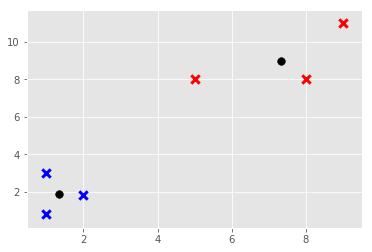

In [54]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
        marker = 'o', c='k',s=60)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', c=color, s=70,linewidth=3)
# plt.show()